# Introduction and Problem Statement

**Introduction:**

Beta-lapachone is a naphthoquinone compound that has been shown to have a variety of biological activities, including anti-cancer, anti-inflammatory, and anti-obesity effects. In recent years, there has been growing interest in the potential of beta-lapachone for the treatment of obesity and its associated metabolic disorders.

One of the key mechanisms by which beta-lapachone is thought to exert its anti-obesity effects is through the regulation of adipogenesis, the process by which fat cells are formed. Beta-lapachone has been shown to inhibit adipogenesis by downregulating the expression of key adipogenesis-related genes and by inducing the apoptosis of adipocytes.

Alpha-lapachone is another naphthoquinone compound that has been shown to have a variety of biological activities, including anti-cancer and anti-inflammatory effects. However, the potential anti-obesity activity of alpha-lapachone has not been well studied.

**Problem Statement**

Given the promising anti-obesity activity of beta-lapachone, it is of interest to investigate whether alpha-lapachone, another member of the naphthoquinones class, also possesses anti-obesity activity. This information could lead to the development of new and more effective anti-obesity therapies.

# Importations

In [ ]:
# imports

import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from IPython.display import Image

# Data Preprocessing

## Data Importation

To screen for potential drug target proteins for alpha-lapachone, we used the Swiss Target Prediction server. This server uses a variety of methods, including machine learning, to predict the targets of small molecules. We also used the UniProt database to screen for a decoy protein dataset. This database contains information on over 230 million proteins from a variety of organisms.Once we had identified a set of potential drug target proteins and a decoy protein dataset, we used a Python-based tool called ProPy3 to screen 8,000 tripeptides for each of the proteins in our dataset. Tripeptides are short peptides that are made up of three amino acids. ProPy3 is a tool that can be used to predict the binding of peptides to proteins.

As a result of this screening process, we generated a dataset of 336,000 tripeptides for alpha-lapachone targets and 672,000 tripeptides for the decoy dataset. This dataset will be used to further investigate the potential anti-obesity activity of alpha-lapachone and to develop new and more effective anti-obesity therapies.

⏬

In [ ]:
# data importation

df1 = pd.read_csv("/data/alpha_lapachone_targets_tripeptide.csv", header=None)
print(df1.shape)
df2 = pd.read_csv('/data/decoy.csv', header=None)
df2 = df2.head(84)
print(df2.shape)

(42, 8000)
(84, 8000)


## Data Transformation and Mangling


To prepare the dataset for training a machine learning model, we first added binary labels to the dataset and then concatenated it from both classes and shuffled it. Once we had shuffled the data, we looked for missing values and removed them from the dataset. These data preprocessing steps are important because they help to ensure that the data is in a format that is compatible with the machine learning algorithm and that it does not contain any missing values.

⏬

In [ ]:
# data transformation and mangling

df1['label'] = 1
df2['label'] = 0
df = pd.concat([df1, df2], ignore_index=True)
df = shuffle(df)
print (df.shape)
print (df)
df.fillna(method ='pad', inplace=True) # filling null values with pad

(126, 8001)
     0  1  2  3  4  5  6  7  8  9  ...  7991  7992  7993  7994  7995  7996  \
27   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     1     0   
99   2  0  0  0  0  0  0  0  0  1  ...     0     0     0     1     0     0   
38   2  0  1  1  0  0  0  0  0  0  ...     0     0     0     0     0     0   
87   0  0  0  0  0  0  0  0  0  0  ...     1     0     0     0     0     0   
69   0  0  0  2  0  0  0  0  0  1  ...     0     0     0     0     0     0   
..  .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
76   1  0  1  1  0  0  0  0  1  0  ...     0     0     2     1     0     0   
119  0  1  2  0  0  2  0  4  0  1  ...     1     0     0     0     1     0   
1    0  0  0  0  1  1  0  0  0  0  ...     0     0     0     1     0     0   
111  1  0  1  1  0  1  2  2  0  2  ...     0     1     1     2     2     0   
108  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

     7997  7998  7999  label  
27      0     0     

## Features Extraction

we used the Pandas library to extract a sub-DataFrame containing the features from our dataset. The features in our dataset consisted of 8000 tripeptides spanning over the samples, which came from two major sources.

⏬

In [ ]:
# features extraction

features = df.iloc[:, :-1]; features

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
38,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
87,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
69,0,0,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1,0,1,1,0,0,0,0,1,0,...,0,0,0,2,1,0,0,0,0,0
119,0,1,2,0,0,2,0,4,0,1,...,1,1,0,0,0,1,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111,1,0,1,1,0,1,2,2,0,2,...,0,0,1,1,2,2,0,0,0,0


## Labels Extraction

we used the Pandas library to extract a sub-DataFrame containing the labels from our dataset. The labels in our dataset consisted of two classes (1 or 0) spanning over the features of 8000 tripeptides.

⏬

In [ ]:
# labels extraction

labels = df.iloc[:,-1:]; labels

,label
27,1
99,0
38,1
87,0
69,0
...,...
76,0
119,0
1,1
111,0


## Splitting Dataset

The features and labels parameters are the input and output variables of the dataset, respectively. The test_size parameter specifies the proportion of the dataset to be used for the test set. The random_state parameter is used to ensure that the split is reproducible.

The train_test_split() function returns four variables:

* X_train: The training data features
* X_test: The test data features
* y_train: The training data labels
* y_test: The test data labels

The test_size parameter is set to 0.3, which means that 30% of the dataset will be used for the test set. The random_state parameter is set to 50, which ensures that the split is reproducible.

⏬

In [ ]:
# splitting dataset

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=50)

# Training and Evaluation

## Classification Report

The precision, recall, and F1 score are three important metrics for evaluating the performance of a machine learning model.

Precision is the fraction of predicted positive cases that are actually positive. It is calculated as follows:

`precision = true positives / (true positives + false positives)`

Recall is the fraction of actual positive cases that are correctly predicted. It is calculated as follows:

`recall = true positives / (true positives + false negatives)`

F1 score is a harmonic mean of precision and recall. It is calculated as follows:

`f1 score = 2 * (precision * recall) / (precision + recall)`

A precision of 87%, recall of 100%, and F1 score of 93% indicate that the machine learning model is performing very well. It is able to correctly identify positive cases (recall) and avoid predicting too many false positives (precision). The F1 score, which is a balanced measure of precision and recall, is also very high.

Overall, the evaluation metrics suggest that the machine learning model is effective at predicting the target class, "alpha-lapachone-targets."

⏬

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8947368421052632

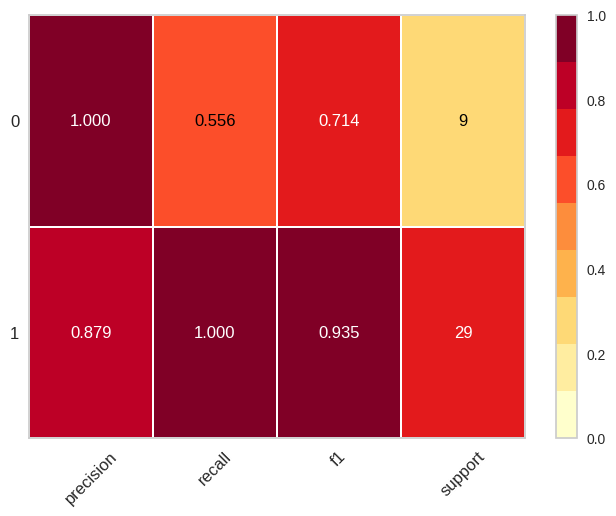

In [ ]:
# classification report

#classes = ["decoy_tripeptide", "target_tripeptide"]
model_1 = LogisticRegression()
visualizer = ClassificationReport(model_1, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

## ROC Curve

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise.’ In other words, it shows the performance of a classification model at all classification thresholds.

The x-axis showing 1 – specificity/false positive fraction.


> `FPR = FP/(FP+TN)`

The y-axis showing sensitivity/true positive fraction.

> `TPR / Recall / Sensitivity = TP/(TP+FN)`

The area under the curve for both decoy and target tripeptides is **0.82**, the indication of clear and distinct training of a model to differentiate between decoy tripeptide and target tripeptide classes.

⏬



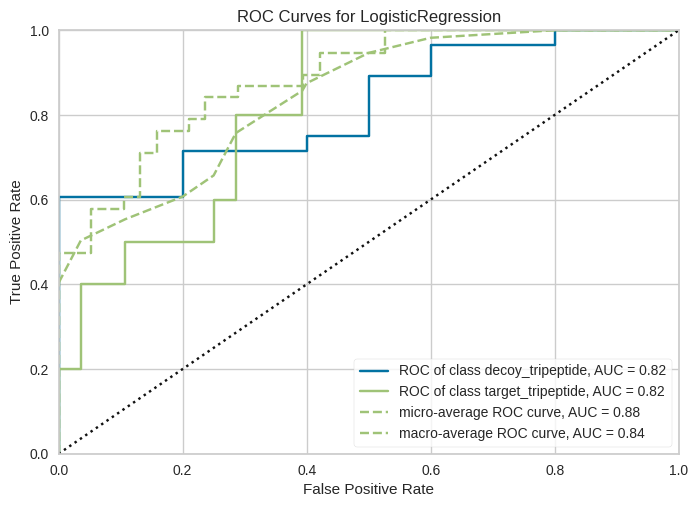

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Roc Curve

visualizer_1 = ROCAUC(model_1, classes = ["decoy_tripeptide", "target_tripeptide"])
visualizer_1.fit(X_train, y_train)
visualizer_1.score(X_test, y_test)
visualizer_1.show()

# Screening of Adipogenesis Pathway

We extracted 83 proteins in the human adipogenesis pathway from the Reactome database and preprocessed the data according to the protocol of this project. We then screened the dataset for new drug target proteins for alpha-lapachone and identified 2 new proteins as potnetial targets.

(83, 8000)


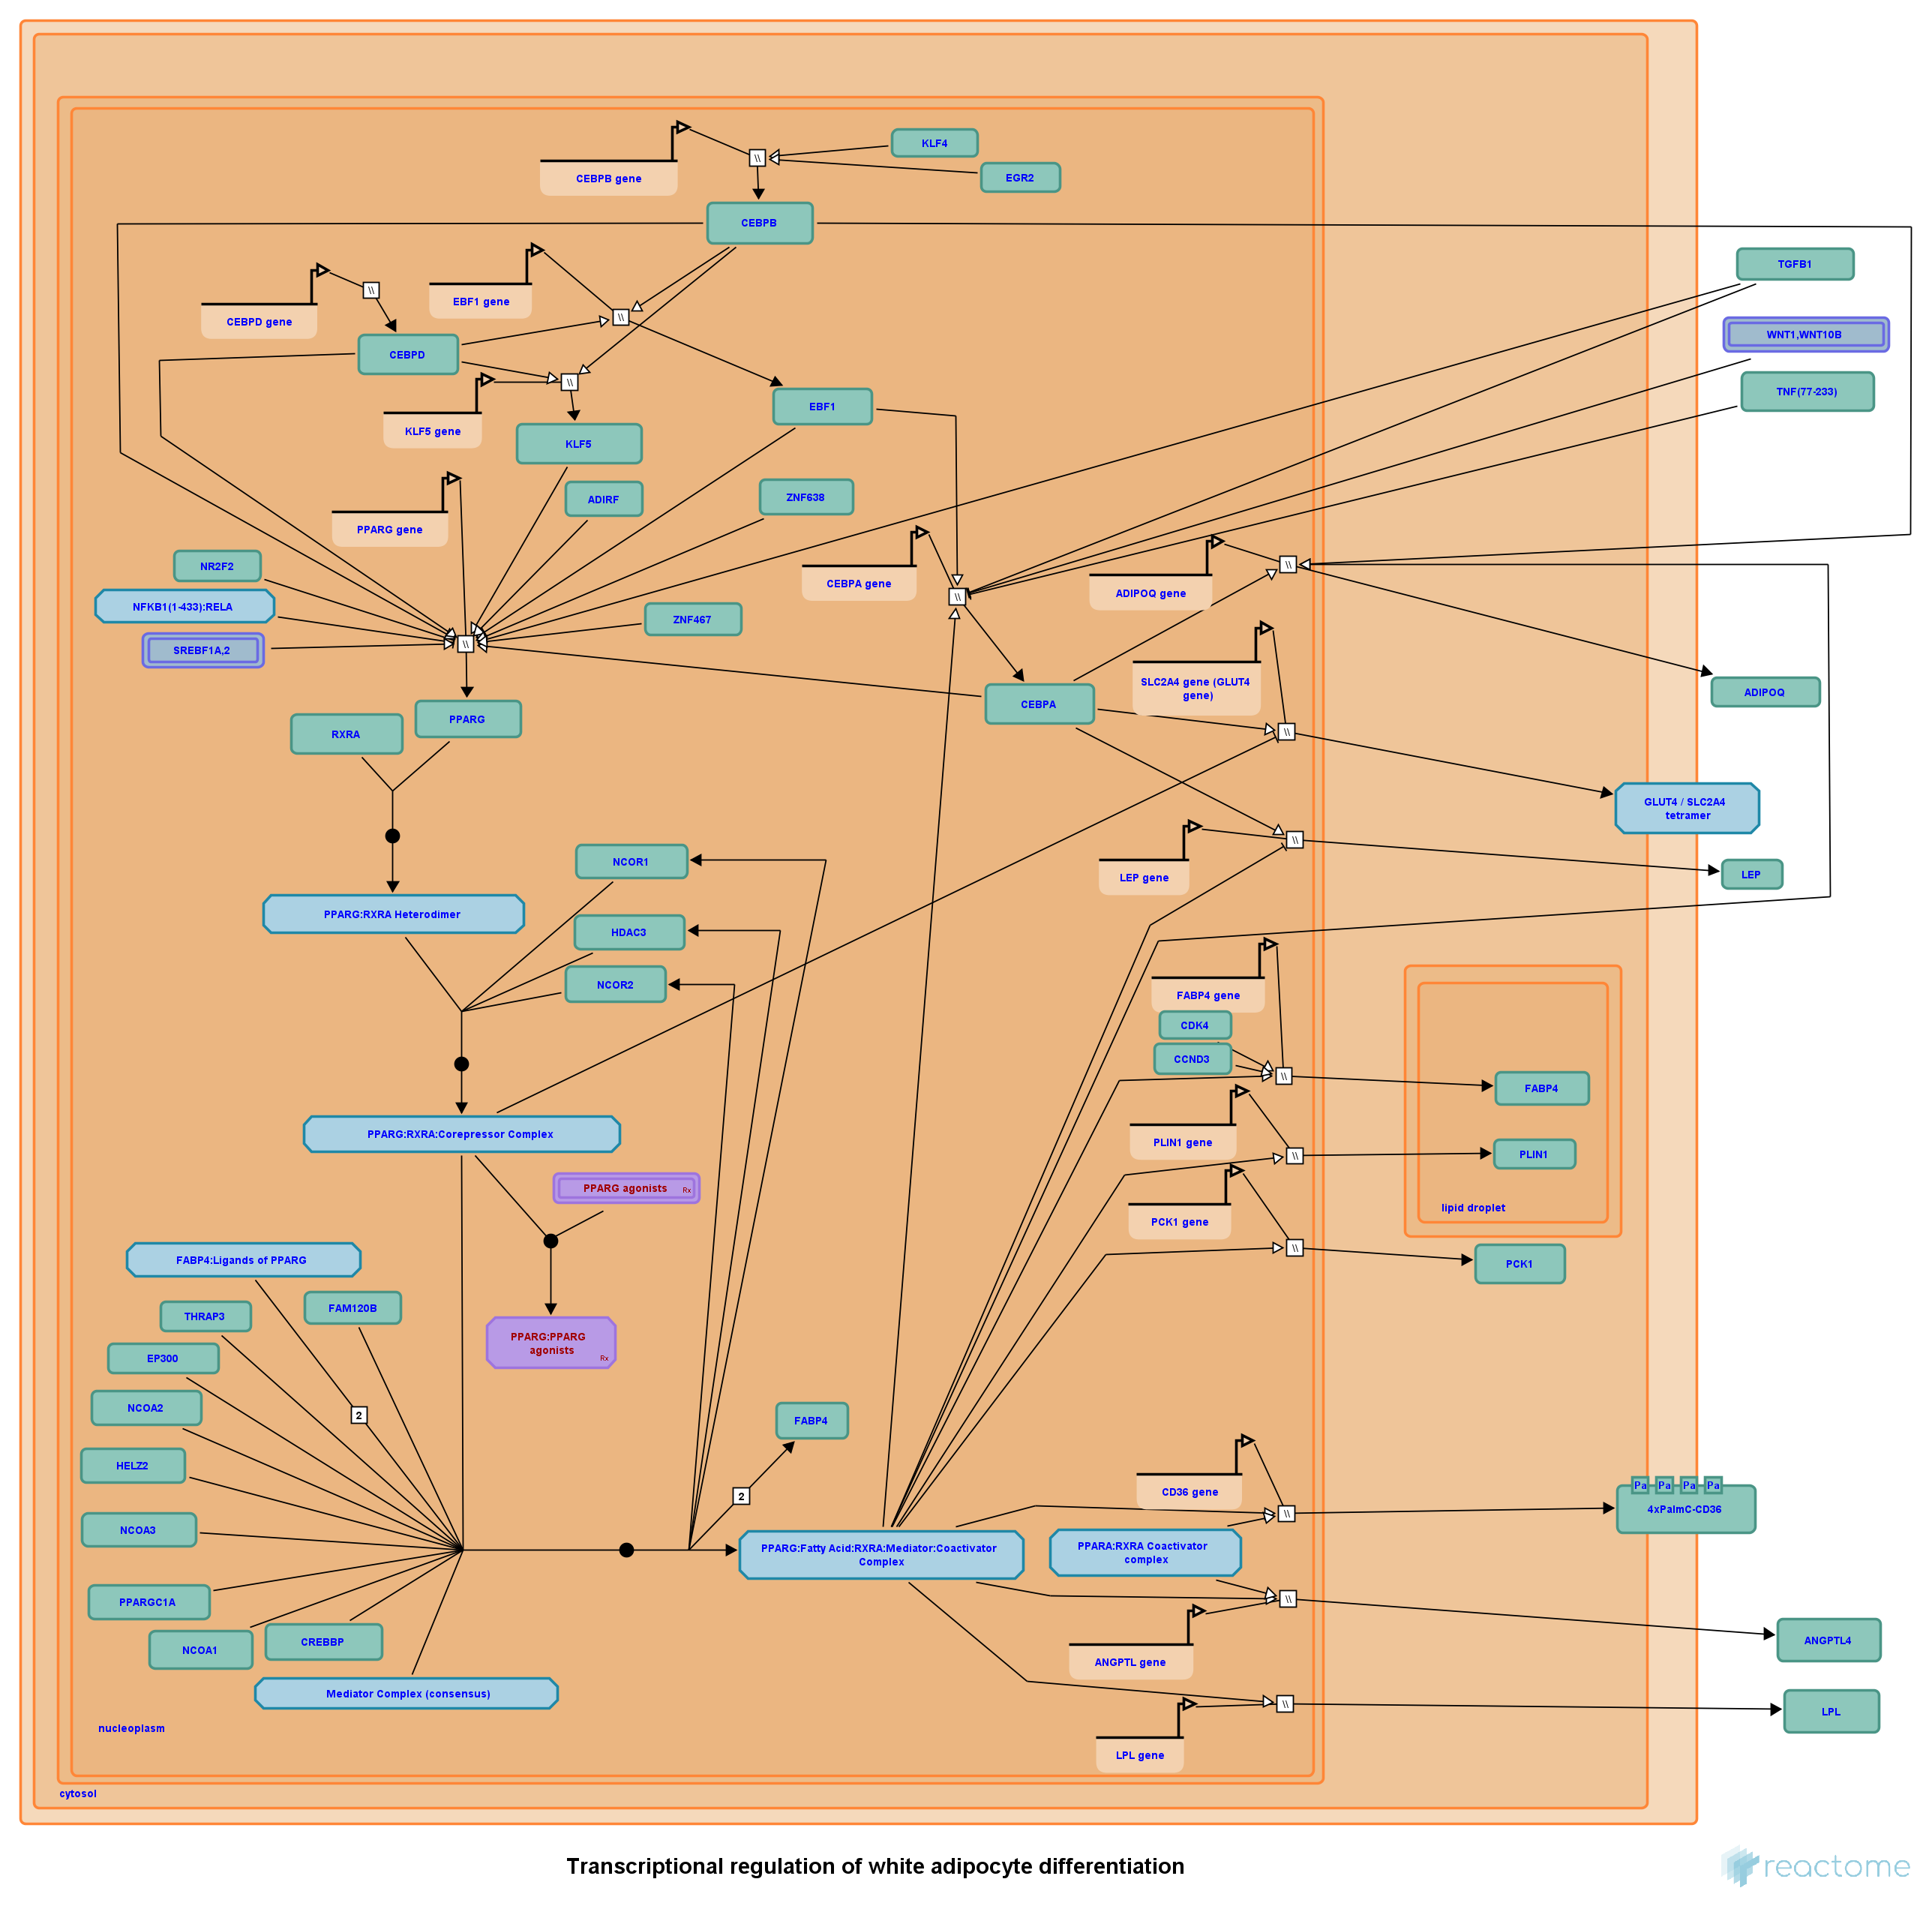

In [ ]:
# importing adipogenesis pathway dataset

screening_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/adipogenesis_screening.csv")
print(screening_data.shape)
Image("/content/drive/MyDrive/Colab Notebooks/data/adipogenesis.png")

In [ ]:
# Data transformation and Predcitions

screening_data.fillna(method ='pad', inplace=True)
predictions = visualizer.predict(screening_data)
predictions = pd.DataFrame(predictions)
predictions

# Conclusion and Prospects

The alpha-lapachone compound might have a putative role in anti-obesity activity via regulating the adipogenesis and immune related pathways. The study consisted of two major data classes including the thripeptide dataset of 42 putataive targets of alpha-lapachone as the main class and tripeptide dataset of 83 random proteins as the decoy class. The Logistic Regression algorithm was trained on both the classes with the following evaluations:
> * Accuracy = 86%
> * Precisison = 87%
> * Recall = 100%
> * F1 Score = 93%
> * AUC = 82%

The human adipogenesis pathway consisiting of 83 proteins was screened through the trained model. It was found that the two genes including "CD36" and "ADIRF" have alike tripeptides to that of the 42 putataive targets of alpha-lapachone. The gene CD36 is a part of basic immune system while "ADIRF" is a basic adipogenesis gene involved in differentiation and stimulates transcription initiation of master adipogenesis factors like PPARG and CEBPA at early stages of preadipocyte differentiation. **The alpha-lapachone might have anti-obesity characteristics through regulating the adipogenesis and immune related responses.**





# About Me:

I am a Bioinformatics and Machine learning expert, practicing insilico development and analytics in the domain of biology and medicine. I am open for research collaborations, you can email me to discuss.

Thank you,
```
Ahsan Raza

Masters in Bioinformatics

aysanraza@gmail.com

Islamabad, Pakistan.
```

# 💻 Tech Stack:
![Python](https://img.shields.io/badge/python-3670A0?style=for-the-badge&logo=python&logoColor=ffdd54) ![Shell Script](https://img.shields.io/badge/shell_script-%23121011.svg?style=for-the-badge&logo=gnu-bash&logoColor=white) ![Anaconda](https://img.shields.io/badge/Anaconda-%2344A833.svg?style=for-the-badge&logo=anaconda&logoColor=white) ![GitHub](https://img.shields.io/badge/GitHub-%23121011.svg?style=for-the-badge&logo=github&logoColor=white) 	![Neo4J](https://img.shields.io/badge/Neo4j-008CC1?style=for-the-badge&logo=neo4j&logoColor=white) ![SQLite](https://img.shields.io/badge/sqlite-%2307405e.svg?style=for-the-badge&logo=sqlite&logoColor=white) ![MySQL](https://img.shields.io/badge/mysql-%2300f.svg?style=for-the-badge&logo=mysql&logoColor=white) ![scikit-learn](https://img.shields.io/badge/scikit--learn-%23F7931E.svg?style=for-the-badge&logo=scikit-learn&logoColor=white) ![SciPy](https://img.shields.io/badge/SciPy-%230C55A5.svg?style=for-the-badge&logo=scipy&logoColor=%white) ![Plotly](https://img.shields.io/badge/Plotly-%233F4F75.svg?style=for-the-badge&logo=plotly&logoColor=white) ![TensorFlow](https://img.shields.io/badge/TensorFlow-%23FF6F00.svg?style=for-the-badge&logo=TensorFlow&logoColor=white) ![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white) ![NumPy](https://img.shields.io/badge/numpy-%23013243.svg?style=for-the-badge&logo=numpy&logoColor=white) ![Keras](https://img.shields.io/badge/Keras-%23D00000.svg?style=for-the-badge&logo=Keras&logoColor=white) ![GIT](https://img.shields.io/badge/Git-fc6d26?style=for-the-badge&logo=git&logoColor=white) ![LINUX](https://img.shields.io/badge/Linux-FCC624?style=for-the-badge&logo=linux&logoColor=black)

## 💰 You can help me by Donating
  [![BuyMeACoffee](https://img.shields.io/badge/Buy%20Me%20a%20Coffee-ffdd00?style=for-the-badge&logo=buy-me-a-coffee&logoColor=black)](https://buymeacoffee.com/https://www.buymeacoffee.com/aysanraza)